# 1 Introducción

El siguiente código genera una nueva imagen a partir de otra especificada por parámetro. La imagen procesada es rotada (-90º y espejada) y construida únicamente con el componente RGB seleccionado por parámetro. Se busca comparar y analizar la performance del procesamiento de estructuras de dos dimensiones en GPU y en CPU.

---
# 2 Armado del ambiente
Toma la dirección web de una imagen con acceso público en internet, la deja disponible al contexto de ejecución del cuaderno Colab.

In [ ]:
#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true" #@param {type:"string"}

#@markdown ---
!wget {url_imagen} -O imagen.jpg

--2020-11-22 16:41:21--  https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/wvaliente/SOA_HPC/raw/main/unlam.jpg [following]
--2020-11-22 16:41:22--  https://github.com/wvaliente/SOA_HPC/raw/main/unlam.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wvaliente/SOA_HPC/main/unlam.jpg [following]
--2020-11-22 16:41:22--  https://raw.githubusercontent.com/wvaliente/SOA_HPC/main/unlam.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147032 (144K) [image/jpeg]


# 3 Desarrollo

Ejecución del algoritmo en CPU.

Imagen del filtro: imagen.jpg - RGB - [1024, 768]
Tiempo de conversión de imagen: 1118.839 [ms]
Tiempo Total: 1180.103 [ms]


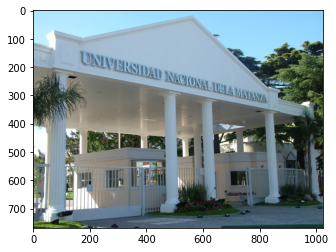

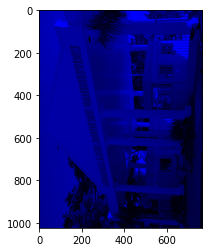

In [53]:
#@title ## 3.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique el filtro de color que desea:
color = 'Azul' #@param ["Rojo", "Verde", "Azul"]
#@markdown ---

%matplotlib inline
from datetime import datetime
from PIL import Image 
import cv2
import  matplotlib.pyplot as plt
import numpy

#Inicia tiempo total de ejecución
tiempo_total = datetime.now()

#Definición de función que transforma el tiempo en  milisegundos
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

#Setea la imagen a procesar
img_nombre = 'imagen.jpg'
image = Image.open(img_nombre) 
  
#Obtiene las dimensiones de la imagen
img_ancho, img_alto = image.size 

#Convierte la imagen comprimida en JPEG/PNG a array
img_inicial = numpy.asarray(image)

#Crea una nueva imagen con las dimensiones invertidas
img_dimension = Image.new(mode = "RGB", size = (img_alto, img_ancho))
img_final = numpy.empty_like(img_dimension)

#Muestra los atributos de la imagen y como se ve antes del filtro
print("Imagen del filtro: " + img_nombre + " - " + image.mode + " - [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

#Muestra la imagen original
plt.figure()
imgplot = plt.imshow(img_inicial)

#Inicia tiempo de conversión de imagen
tiempo_img = datetime.now()

#Selecciona color según lo elegido por parámetro    
img = cv2.imread('imagen.jpg')
x,y,z = img.shape

#Llena la matriz con ceros
img_color = numpy.zeros((x,y,z),numpy.uint8)

#Selecciona color según lo elegido por parámetro
if color is 'Rojo':
  img_color[:,:,0] = img[:,:,0]
elif color is 'Verde':
  img_color[:,:,1] = img[:,:,1]
elif color is 'Azul':
  img_color[:,:,2] = img[:,:,2]

#Rota la imagen
for y  in range( 0, img_ancho):
  for x in range( 0, img_alto):
    img_final[y][x] = img_color[x][y]

#Finaliza el tiempo de conversión de imagen
tiempo_img = datetime.now() - tiempo_img

#Muestra la imagen luego de aplicarle el filtro
plt.figure()
imgplot = plt.imshow(img_final)

#Calcula tiempo total de ejecución
tiempo_total = datetime.now() - tiempo_total

#Muestra los tiempos de conversión y total de ejecución
print( "Tiempo de conversión de imagen:", tiempo_en_ms(tiempo_img), "[ms]" )
print( "Tiempo Total:", tiempo_en_ms(tiempo_total), "[ms]" )


---
# 4 Tabla de pasos de ejecución del programa

Procesador  |Función               |Detalle
------------|----------------------|-----------------------------------------
CPU         |wget url_imagen       |Lee la dirección URL de la imagen a procesar.
CPU         |matplotlib inline     |Macro de Colab para mostrar imágenes.
CPU         |import                |Importa los módulos para funcionar.
CPU         |datetime.now()        |Toma el tiempo actual.
CPU         |Image.open(..)        |Abre el archivo de la imagen.
CPU         |numpy.asarray(..)     |Convierte el formato comprimido a RAW.
CPU         |Image.new()           |Crea una nueva imagen.
CPU         |numpy.empty_like(..)  |Genera el array destino, que tendrá a la imagen resultado. 
CPU         |print(..)             |Informa los atributos de la imagen.
CPU         |plt.figure()          |Crea un objeto figura.
CPU         |plt.imshow            |Muestra la imagen original.
CPU         |datetime.now()        |Toma el tiempo actual para calcular el tiempo de conversión de imagen.
CPU         |cv2.imread(..)        |Lee la imagen para extraer el color elegido.
CPU         |numpy.zeros(..)       |Llena la matriz con ceros.
CPU         |if..elif..elif..      |Rellenan el canal RGB de la imagen según el color elegido.
CPU         |for..for..            |Rotan la imagen
CPU         |datetime.now()        |Toma el tiempo actual para calcular el tiempo de conversión de imagen.
CPU         |plt.figure()          |Crea un objeto figura.
CPU         |plt.imshow            |Muestra la imagen resultado.
CPU         |datetime.now()        |Toma el tiempo actual para calcular el tiempo total de ejecución.
CPU         |print(..)             |Informa el tiempo de conversión de imagen.
CPU         |print(..)             |Informa el total de ejecución.



---
# 5 Conclusiones
Como una conclusión general y empírica se puede observar que los datos, tras cierta cantidad de ejecuciones, arrojan que el procesamiento a partir de la GPU es muchísimo más eficiente. 

Por ejemplo: 

Ejecución de procesamiento de imagen en CPU: 1110.404 [ms].

Ejecución de procesamiento de imagen en GPU: 0.142 [ms].

Se puede ver drásticamente la diferencia de tiempos entre cada ejecución al momento de procesar la imagen.

Se destaca que: Como la CPU por su composición de unos pocos núcleos está diseñada para el procesamiento en serie. En cambio, la GPU, que tiene miles de núcleos se le terminan encargando tareas que requieren un alto grado de paralelismo, generalmente, una instrucción y múltiples datos.

---
# 6 Bibliografía

[1] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[2] Python Operators: [Página GeekforGeeks](https://www.geeksforgeeks.org/python-operators/)

[3] Forms - Colaboratory: [Página Colab](https://colab.research.google.com/notebooks/forms.ipynb#scrollTo=_7gRpQLXQSID)

[4] ¿QUÉ ES LA COMPUTACIÓN ACELERADA POR GPU?: [Página Nvidia](https://www.nvidia.com/es-la/drivers/what-is-gpu-computing/)

[5] RGB en OpenCV: [Página Omes-va](https://omes-va.com/rgb/)

[6] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)






